Date           0
Open Price     0
High Price     0
Low Price      0
Close Price    0
Volume         0
dtype: int64 Date            0
Stock Splits    0
dtype: int64 Date                0
Declaration Date    1
Record Date         1
Payment Date        1
Dividend            0
dtype: int64


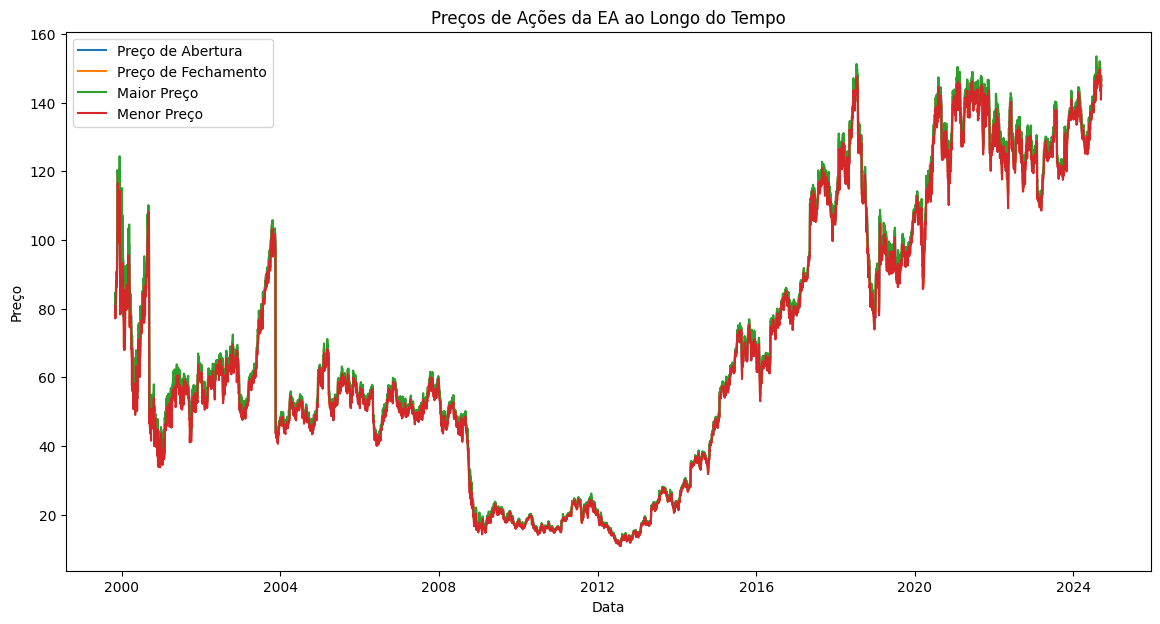

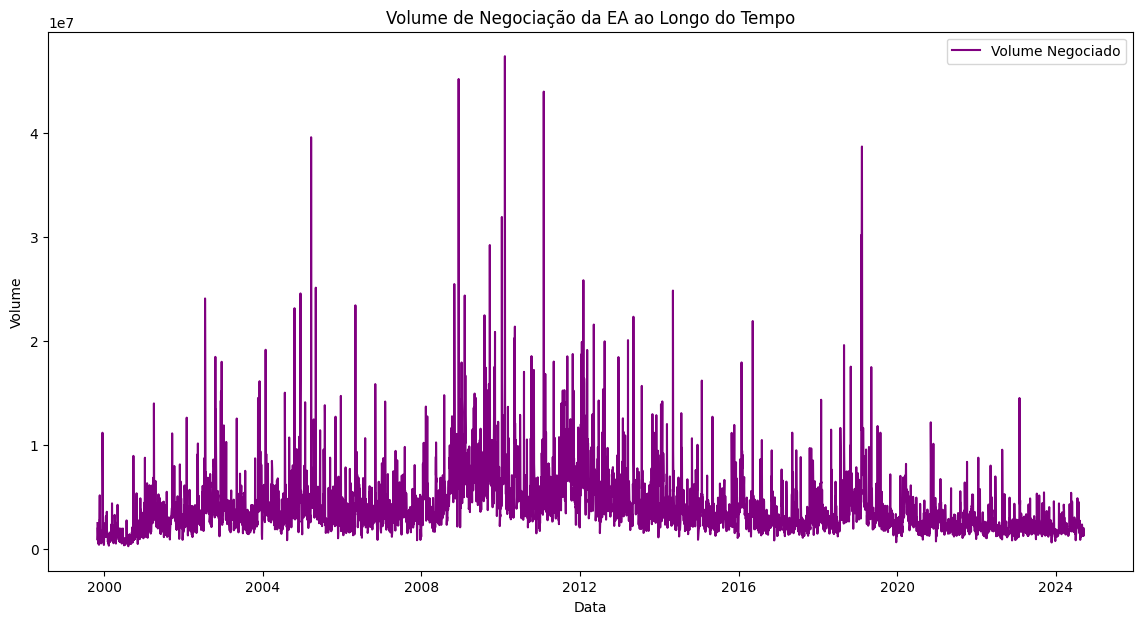

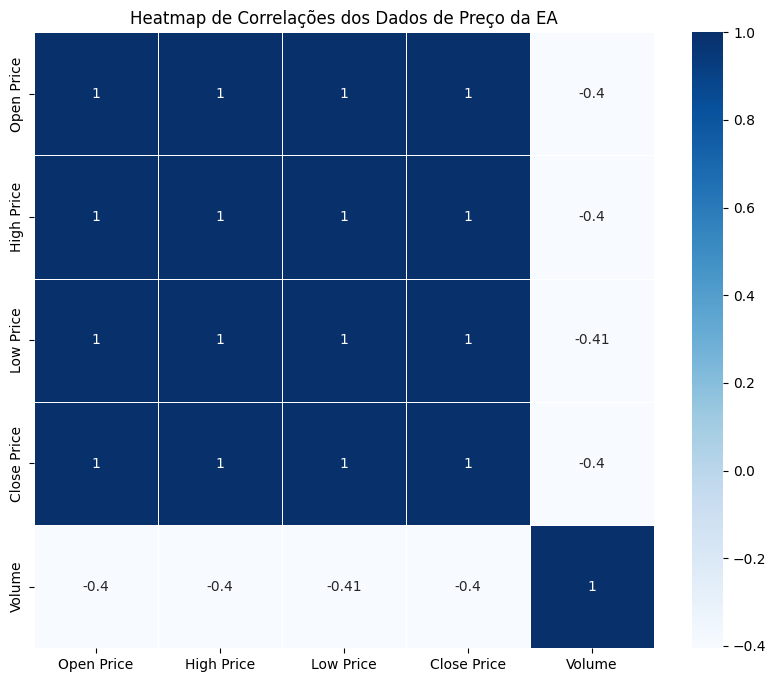

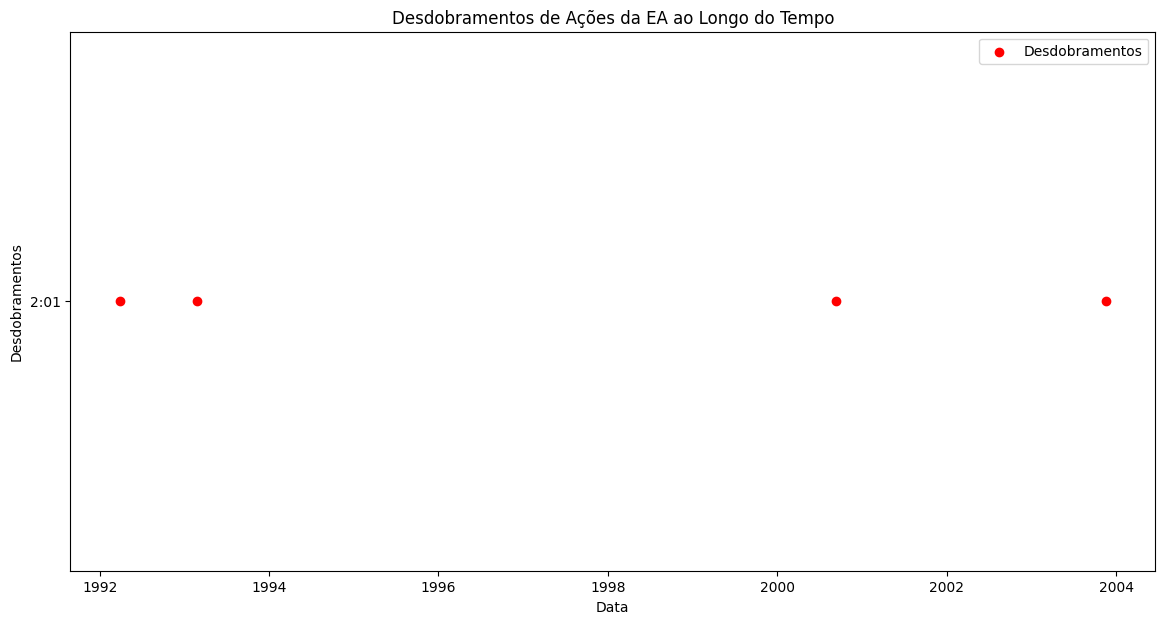

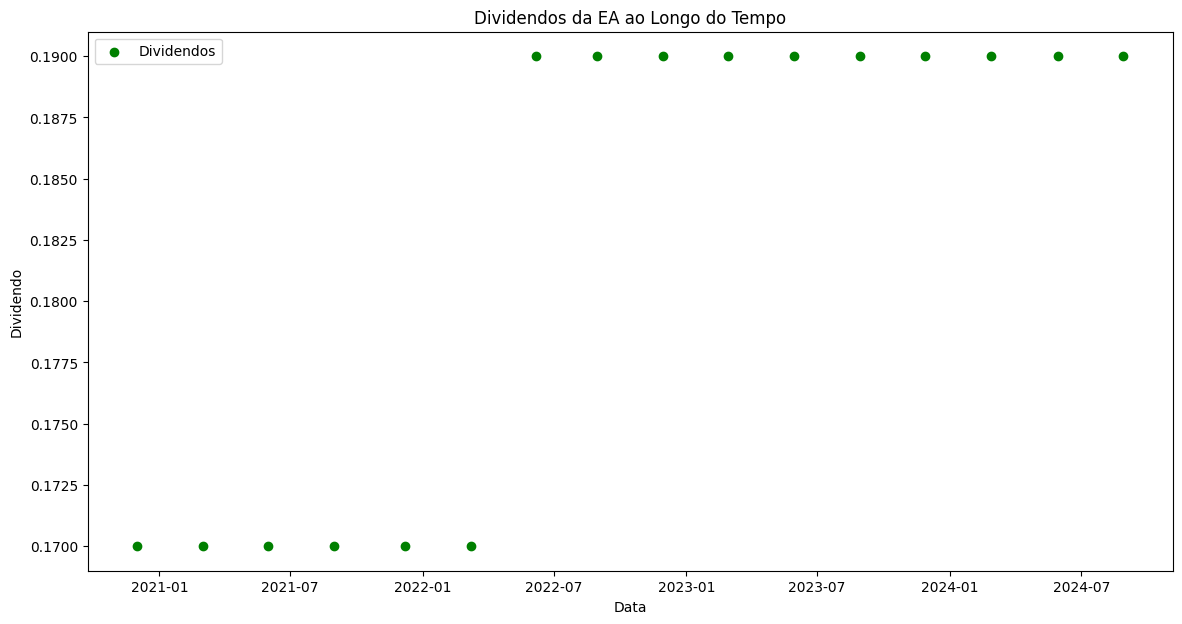

Erro Quadrático Médio: 0.570583771078236, R²: 0.9996502438256976


In [21]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suprimir avisos para evitar poluição visual
warnings.filterwarnings('ignore')

# Carregar os dados
df_preco = pd.read_csv('EA_stock_price.csv')
df_desdobramento = pd.read_csv('EA_stock_split.csv')
df_dividendo = pd.read_csv('EA_stock_dividend.csv')

# Converter colunas de data para o formato datetime
df_preco['Date'] = pd.to_datetime(df_preco['Date'], errors='coerce')
df_desdobramento['Date'] = pd.to_datetime(df_desdobramento['Date'], errors='coerce')
df_dividendo['Date'] = pd.to_datetime(df_dividendo['Date'], errors='coerce')
df_dividendo['Declaration Date'] = pd.to_datetime(df_dividendo['Declaration Date'], errors='coerce')
df_dividendo['Record Date'] = pd.to_datetime(df_dividendo['Record Date'], errors='coerce')
df_dividendo['Payment Date'] = pd.to_datetime(df_dividendo['Payment Date'], errors='coerce')

# Verificar valores nulos
print(df_preco.isnull().sum(), df_desdobramento.isnull().sum(), df_dividendo.isnull().sum())

# Plotar os preços das ações ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df_preco['Date'], df_preco['Open Price'], label='Preço de Abertura')
plt.plot(df_preco['Date'], df_preco['Close Price'], label='Preço de Fechamento')
plt.plot(df_preco['Date'], df_preco['High Price'], label='Maior Preço')
plt.plot(df_preco['Date'], df_preco['Low Price'], label='Menor Preço')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preços de Ações da EA ao Longo do Tempo')
plt.legend()
plt.show()

# Plotar volume de negociação ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df_preco['Date'], df_preco['Volume'], label='Volume Negociado', color='purple')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.title('Volume de Negociação da EA ao Longo do Tempo')
plt.legend()
plt.show()

# Analisar correlação entre colunas numéricas
df_numerico = df_preco.select_dtypes(include=[np.number])
correlacao = df_numerico.corr()

# Plotar heatmap de correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Heatmap de Correlações dos Dados de Preço da EA')
plt.show()

# Plotar desdobramentos de ações
plt.figure(figsize=(14, 7))
plt.scatter(df_desdobramento['Date'], df_desdobramento['Stock Splits'], color='red', label='Desdobramentos')
plt.xlabel('Data')
plt.ylabel('Desdobramentos')
plt.title('Desdobramentos de Ações da EA ao Longo do Tempo')
plt.legend()
plt.show()

# Plotar dividendos ao longo do tempo
plt.figure(figsize=(14, 7))
plt.scatter(df_dividendo['Date'], df_dividendo['Dividend'], color='green', label='Dividendos')
plt.xlabel('Data')
plt.ylabel('Dividendo')
plt.title('Dividendos da EA ao Longo do Tempo')
plt.legend()
plt.show()

# Preparar dados para modelagem
X = df_numerico.drop(columns=['Close Price'])
y = df_numerico['Close Price']

# Dividir os dados em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Fazer previsões
y_predito = modelo.predict(X_teste)

# Avaliar o modelo
mse = mean_squared_error(y_teste, y_predito)
r2 = r2_score(y_teste, y_predito)
print(f'Erro Quadrático Médio: {mse}, R²: {r2}')
